# Tutorial 6 - Procesamiento morfológico

En este tutorial veremos los siguientes conceptos:

- Filtros de Apertura y Cierre
- Perímetro (usando erosión)
- Gradiente morfológico
- Filtro Top-Hat

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Filtros morfológicos

## Recordatorio: Segmentación por color usando HSV

Reutilizaremos la segmención de manzanas visto en el Tutorial 3.

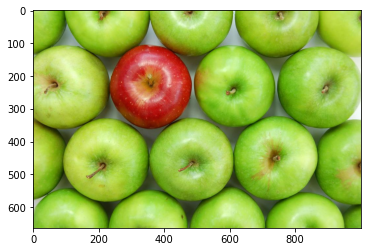

In [2]:
apples_rgb = cv2.imread('manzanas.jpeg', cv2.IMREAD_COLOR)[:, :, ::-1] 
plt.imshow(apples_rgb)

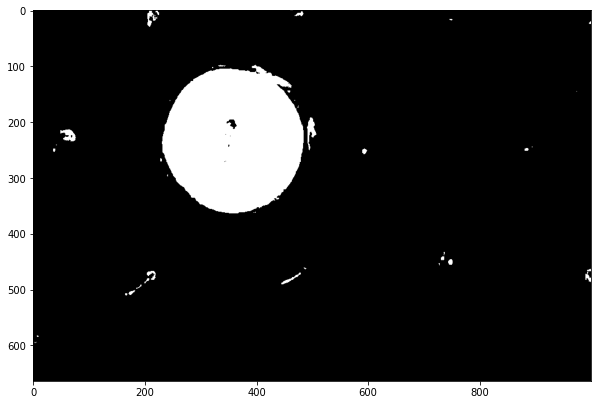

In [3]:
apples_hsv = cv2.cvtColor(apples_rgb, cv2.COLOR_RGB2HSV)

bin_mask = (apples_hsv[:, :, 0] < 20) | (apples_hsv[:, :, 0] > 160)
plt.figure(figsize=(10,10))
plt.imshow(bin_mask, cmap='gray')

## Apertura

Para eliminar los el ruido fuera de la forma de la manzana haremos una operación de apertura. La apertura consiste en realizar una erosión seguida de una dilatación. Veremos cómo realizar esto con OpenCV.

In [6]:
kernel_size = (3,3)

# Usar OpenCV para crear un kernel
# cv2.MORPH_RECT -> Rectangulo
# cv2.MORPH_CROSS -> Cruz 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

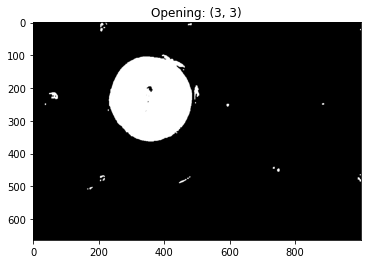

In [7]:
opening = cv2.morphologyEx(bin_mask*1., cv2.MORPH_OPEN, kernel)

plt.title(f"Opening: {kernel_size}")
plt.imshow(opening, cmap='gray')
plt.show()

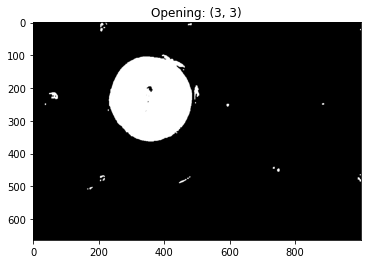

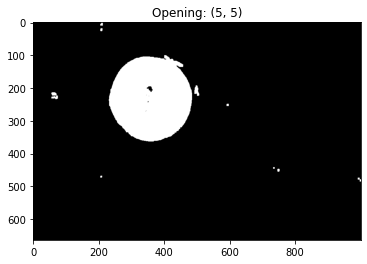

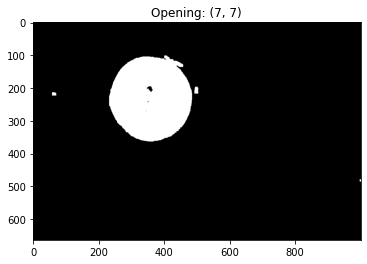

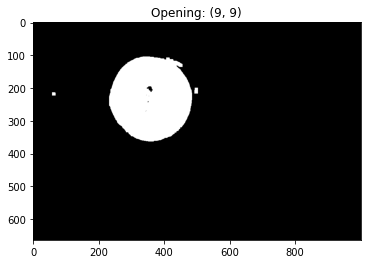

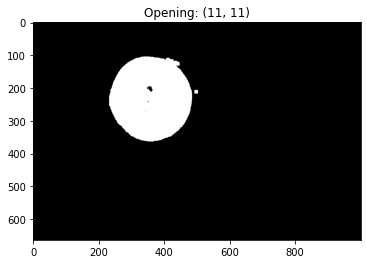

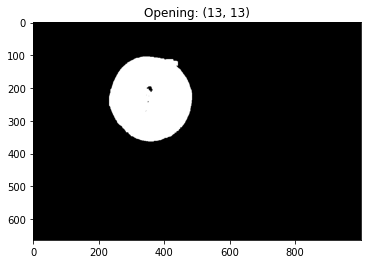

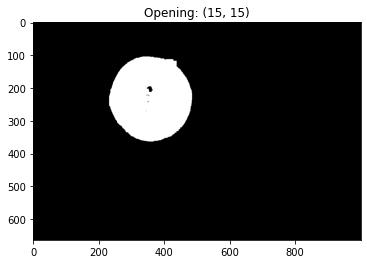

In [8]:
kernel_sizes = [(3, 3), (5, 5), (7, 7), (9,9), (11, 11), (13,13), (15,15)]

for kernel_size in kernel_sizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    opening = cv2.morphologyEx(bin_mask*1., cv2.MORPH_OPEN, kernel)
    plt.title(f"Opening: {kernel_size}")
    plt.imshow(opening, cmap='gray')
    plt.show()

## Cierre

Para rellenar la forma de la manzana, realizaremos una operación de cierre. El cierre consiste en realizar una dilatación seguida de una erosión. Veremos cómo realizar esto con OpenCV.

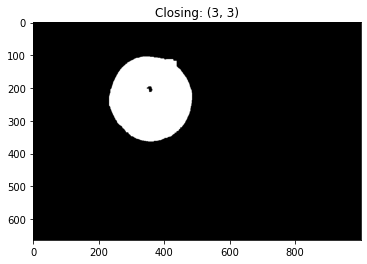

In [9]:
kernel_size = (3,3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Se usa el mismo comando pero cambiando
# cv2.MORPH_OPEN -> cv2.MORPH_CLOSE
closing = cv2.morphologyEx(opening*1., cv2.MORPH_CLOSE, kernel)

plt.title(f"Closing: {kernel_size}")
plt.imshow(closing, cmap='gray')
plt.show()

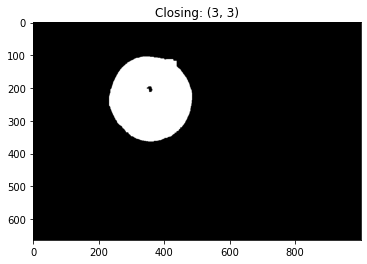

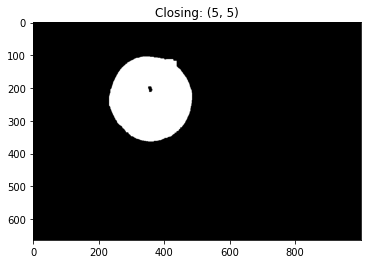

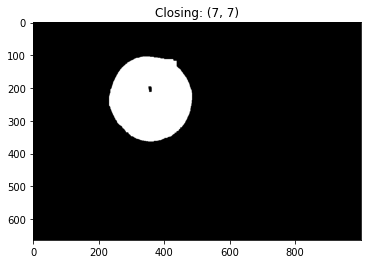

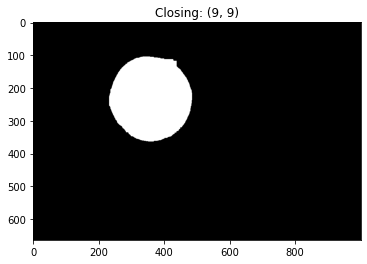

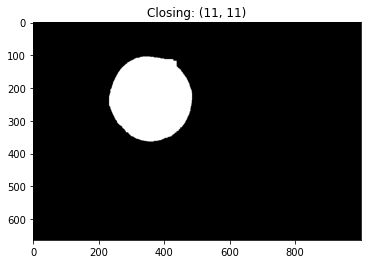

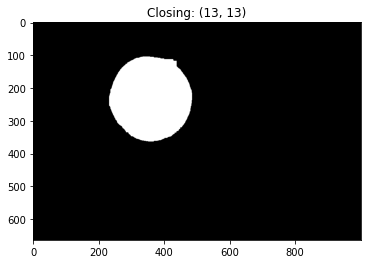

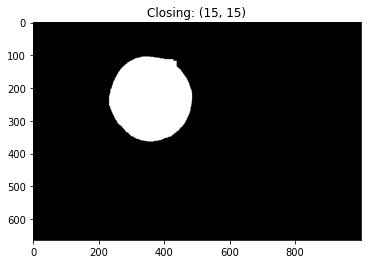

In [10]:
kernel_sizes = [(3, 3), (5, 5), (7, 7), (9,9), (11, 11), (13,13), (15,15)]

for kernel_size in kernel_sizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    closing = cv2.morphologyEx(opening*1., cv2.MORPH_CLOSE, kernel)
    plt.title(f"Closing: {kernel_size}")
    plt.imshow(closing, cmap='gray')
    plt.show()

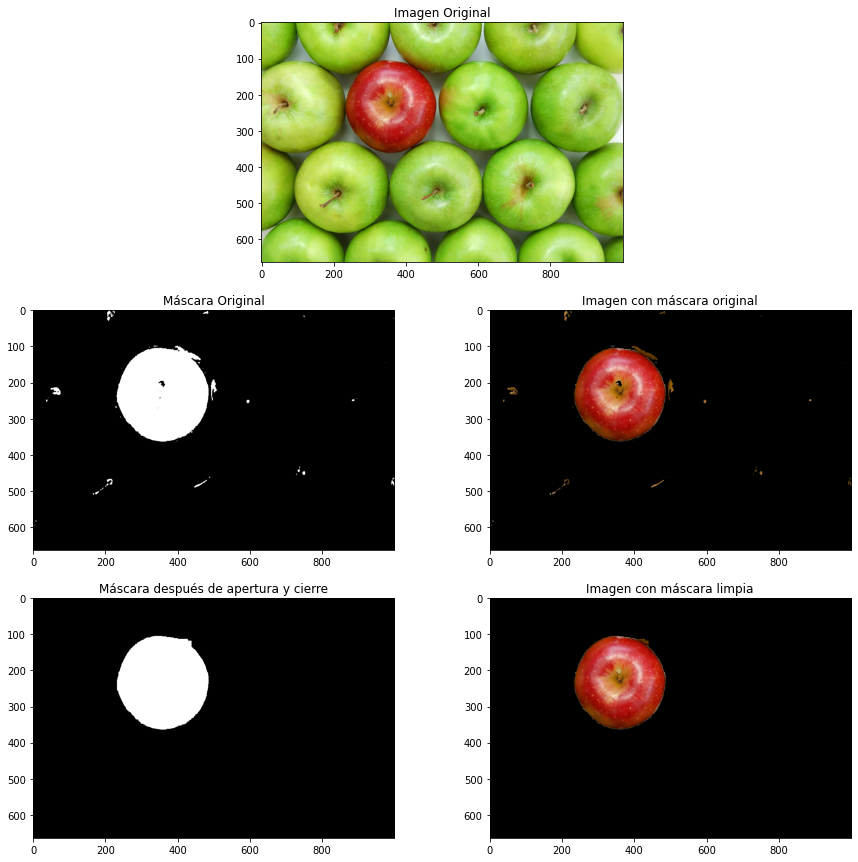

In [11]:
clean_mask = closing.copy()

original_mask_rgb = np.stack([bin_mask,bin_mask,bin_mask], axis=-1)
original_masked_image = np.multiply(apples_rgb, original_mask_rgb)

clean_mask_bool = clean_mask.astype(bool)
clean_mask_rgb = np.stack([clean_mask_bool,clean_mask_bool,clean_mask_bool], axis=-1)
clean_masked_image = np.multiply(apples_rgb, clean_mask_rgb)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplot(3,1,1)
plt.title("Imagen Original")
plt.imshow(apples_rgb)

plt.subplot(3,2,3)
plt.title("Máscara Original")
plt.imshow(bin_mask, cmap='gray')

plt.subplot(3,2,4)
plt.title("Imagen con máscara original")
plt.imshow(original_masked_image)

plt.subplot(3,2,5)
plt.title("Máscara después de apertura y cierre")
plt.imshow(clean_mask, cmap='gray')

plt.subplot(3,2,6)
plt.title("Imagen con máscara limpia")
plt.imshow(clean_masked_image)

## Perímetro

Para encontrar el perímetro (es decir, los bordes) de un objeto debebos realizar una operación de erosión y restarle la imagen erosionada a la imagen original. Veremos cómo encontrar la 

In [12]:
kernel_size = (3,3)

# Usar OpenCV para crear un kernel
# cv2.MORPH_RECT -> Rectangulo
# cv2.MORPH_CROSS -> Cruz 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)
kernel

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

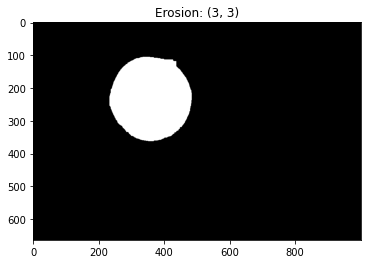

In [13]:
eroded = cv2.morphologyEx(clean_mask, cv2.MORPH_ERODE, kernel)

plt.title(f"Erosion: {kernel_size}")
plt.imshow(eroded, cmap='gray')
plt.show()

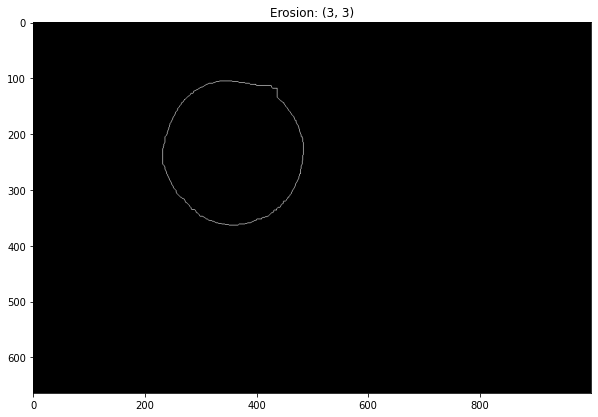

In [14]:
# Se usa el mismo comando pero cambiando
# cv2.MORPH_OPEN -> cv2.MORPH_CLOSE
perimeter = clean_mask - eroded

plt.figure(figsize=(10,10))
plt.title(f"Erosion: {kernel_size}")
plt.imshow(perimeter, cmap='gray')
plt.show()

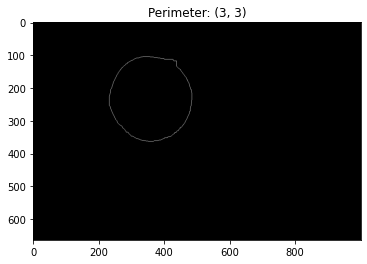

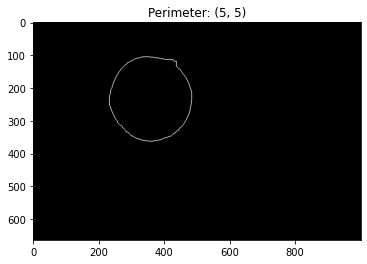

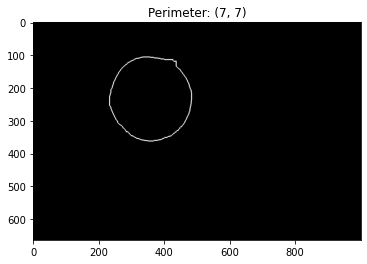

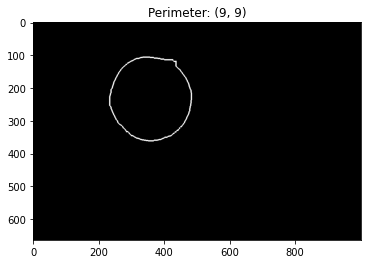

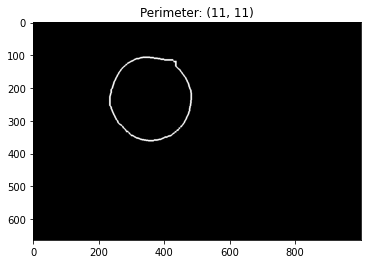

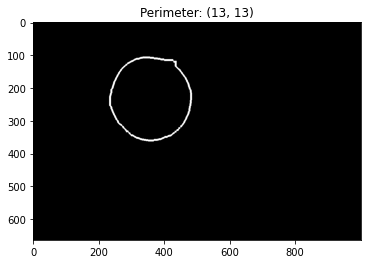

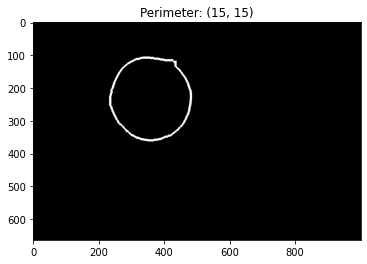

In [15]:
kernel_sizes = [(3, 3), (5, 5), (7, 7), (9,9), (11, 11), (13,13), (15,15)]

# loop over the kernels sizes
for kernel_size in kernel_sizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)
    eroded = cv2.morphologyEx(closing, cv2.MORPH_ERODE, kernel)
    perimeter = closing - eroded


    plt.title(f"Perimeter: {kernel_size}")
    plt.imshow(perimeter, cmap='gray')
    plt.show()

# Gradiente morfológico

Ahora veremos cómo calcular el gradiente morfológico en una imagen de escala de grises. Para esto se usan las mismas funciones que usamos en imágenes binarias.

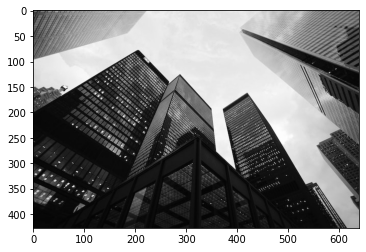

In [16]:
buildings = cv2.imread('buildings.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(buildings, cmap='gray')

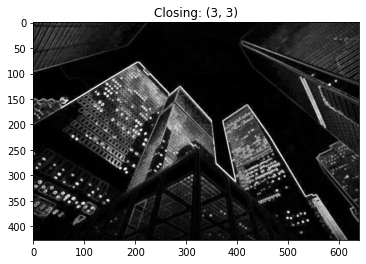

In [17]:
kernel_size = (3,3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

gradient = cv2.morphologyEx(buildings, cv2.MORPH_GRADIENT, kernel)

plt.title(f"Closing: {kernel_size}")
plt.imshow(gradient, cmap='gray')
plt.show()

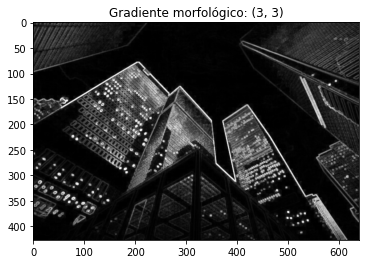

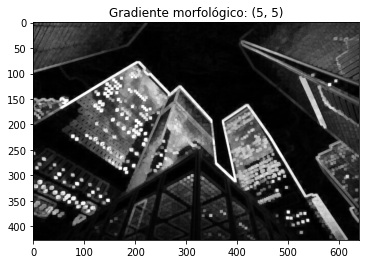

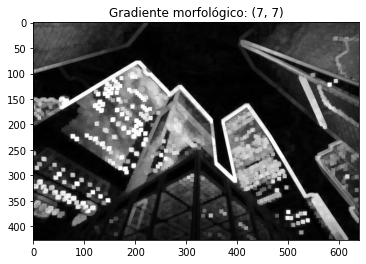

In [18]:
kernel_sizes = [(3, 3), (5, 5), (7, 7)]

# loop over the kernels sizes
for kernel_size in kernel_sizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    gradient = cv2.morphologyEx(buildings, cv2.MORPH_GRADIENT, kernel)
    plt.title(f"Gradiente morfológico: {kernel_size}")
    plt.imshow(gradient, cmap='gray')
    plt.show()

# Top hat

Finalmente veremos la implementación del filtro tophat para ver cómo corregir las imagenes que tienen una iluminación que no es homogénea.

Nuestro objetivo será segmentar las flores de la imagen usando un umbral

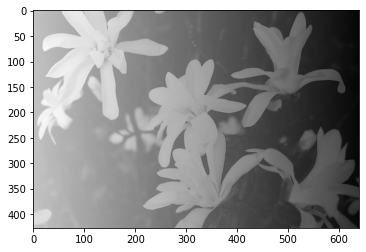

In [19]:
flowers = cv2.imread('flowers.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(flowers, cmap='gray')

(array([16811., 19814., 31685., 34929., 29502., 38948., 47673., 30471.,
        16534.,  6913.]),
 array([  5. ,  27.9,  50.8,  73.7,  96.6, 119.5, 142.4, 165.3, 188.2,
        211.1, 234. ]),
 <BarContainer object of 10 artists>)

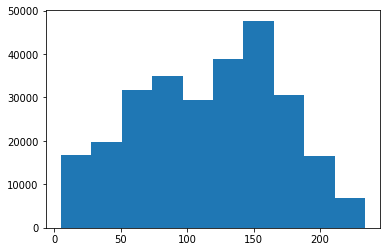

In [20]:
plt.hist(flowers.ravel())

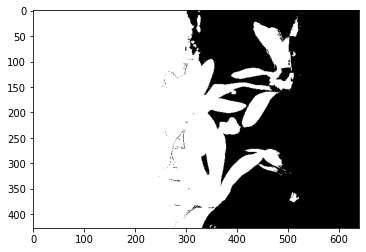

In [21]:
plt.imshow(flowers>100, cmap='gray')

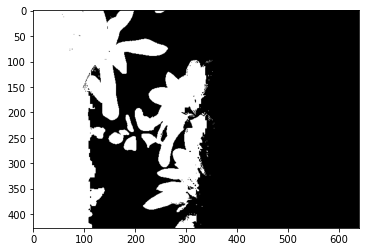

In [22]:
plt.imshow(flowers>150, cmap='gray')

Es dificil encontrar un buen umbral debido a la iluminación no homogénea.

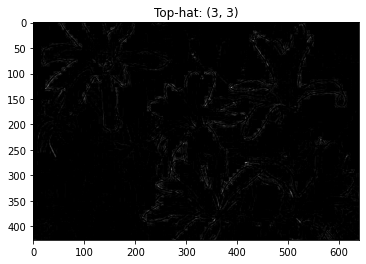

In [23]:
kernel_size = (3,3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

tophat = cv2.morphologyEx(flowers, cv2.MORPH_TOPHAT, kernel)

plt.title(f"Top-hat: {kernel_size}")
plt.imshow(tophat, cmap='gray')
plt.show()

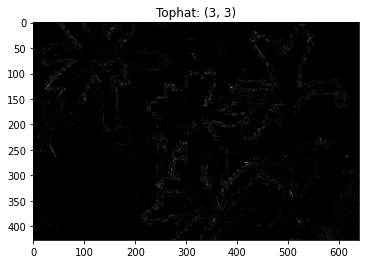

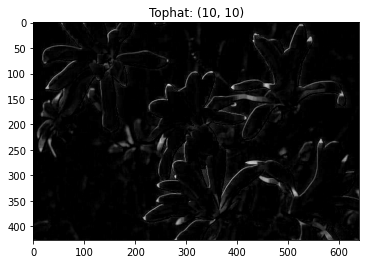

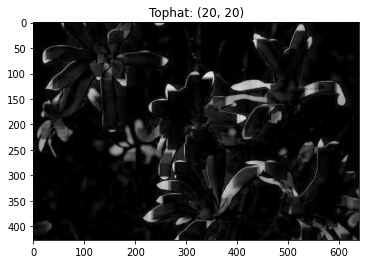

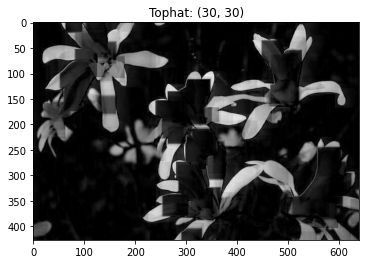

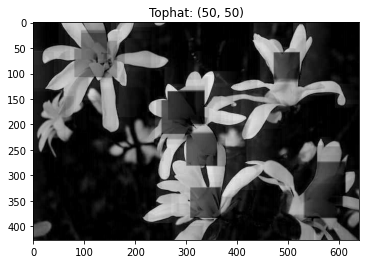

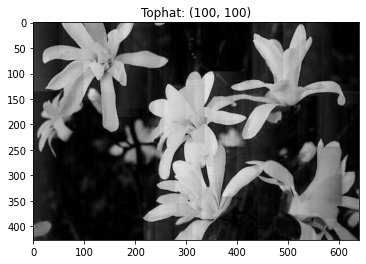

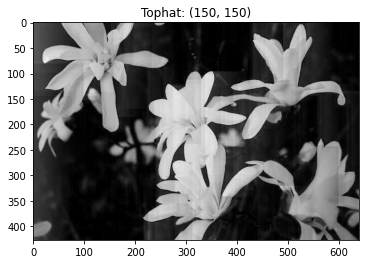

In [24]:
kernel_sizes = [(3, 3), (10, 10), (20,20), (30,30), (50,50), (100,100), (150,150)]

# loop over the kernels sizes
for kernel_size in kernel_sizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    tophat = cv2.morphologyEx(flowers, cv2.MORPH_TOPHAT, kernel)
    plt.title(f"Tophat: {kernel_size}")
    plt.imshow(tophat, cmap='gray')
    plt.show()

(array([108532.,  40775.,  15621.,   5472.,   7420.,  14824.,  29098.,
         31404.,  19905.,    229.]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <BarContainer object of 10 artists>)

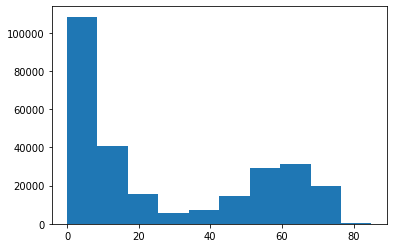

In [25]:
plt.hist(tophat.ravel())

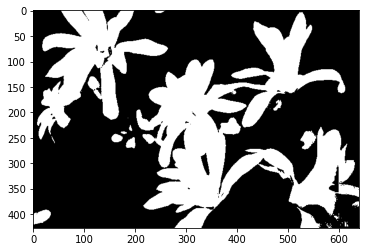

In [26]:
plt.imshow(tophat>40, cmap='gray')